# **1.0 INTRODUCTION**
The aim of this project is to utilise ***reinforcement learning*** to train a machine to learn how to rebalance a portfolio of stocks given what happened prior in the market. For this project, our portfilio will initially focus on the ***Dow Jones Index*** of **30 constituents**.

## **1.1 Import Dependencies**

In [1]:
import yfinance as yf
import pandas as pd
import pickle
import seaborn as sns
from functools import reduce

## **1.2 Data Preparation and Cleaning**
We'll select the stocks from the DOW JONES for our analysis.

In [2]:
DOW_30_TICKER = [
    "AXP",
    "AMGN",
    "AAPL",
    "BA",
    "CAT",
    "CSCO",
    "CVX",
    "GS",
    "HD",
    "HON",
    "IBM",
    "INTC",
    "JNJ",
    "KO",
    "JPM",
    "MCD",
    "MMM",
    "MRK",
    "MSFT",
    "NKE",
    "PG",
    "TRV",
    "UNH",
    "CRM",
    "VZ",
    "V",
    "WBA",
    "WMT",
    "DIS",
    "DOW"
]

We'll make dictionaries for each ticker and store financial data within them.

In [4]:
# It will be nice to form a list of dictionaries for each of our tickers. 
# We'll focus on ticker name, the yahoo finance object, info and historical prices over the past 10 years
DOW_30_tickers_data = []
for ticker in DOW_30_TICKER:
    ticker_dict = {
                   'ticker': ticker, 
                   'info': yf.Ticker(ticker).info,
                   'daily_prices':yf.Ticker(ticker).history(period = '10y', interval = '1d')
                   }
    DOW_30_tickers_data.append(ticker_dict) 
    

KeyboardInterrupt: 

In [5]:
# It would also be good for us to include the sector and industry for each ticker
for i in NASDAQ_100_tickers_data:
    i['sector'] = i['info']['sector']
    i['industry'] = i['info']['industry']

In [19]:
# The historical prices for each ticker is a DataFrame.
# Whilst it has the actual prices, we don't have the, sector or industry. So we should add it in for each ticker.
for i in NASDAQ_100_tickers_data:
    i['daily_prices']['sector'] = i['sector']
    i['daily_prices']['industry'] = i['industry']
    # Percentage change will also be a good value to calcualte
    i['daily_prices']['return'] = i['daily_prices']['adjclose'].pct_change()
    

In [8]:
# it will be good to label encode our tickcers
for count, ticker in enumerate(NASDAQ_100_tickers_data):
    ticker['daily_prices']['ticker'] = count

In [10]:
# for our daily prices, not all stocks have the same order of columns, so we should standardise this
column_order = ['close', 'low', 'volume', 'high', 'open', 'adjclose', 'ticker', 'sector', 'industry', 'return']

for ticker in NASDAQ_100_tickers_data:
    ticker['daily_prices'] = ticker['daily_prices'][column_order]

In [11]:
# make our index a datetime object
for ticker in NASDAQ_100_tickers_data:
    ticker['daily_prices'] = ticker['daily_prices'].reset_index()
    ticker['daily_prices'] = ticker['daily_prices'].rename({'index': 'Date'}, axis = 1)
    ticker['daily_prices']['Date'] = pd.to_datetime(ticker['daily_prices']['Date'])
    ticker['daily_prices'] = ticker['daily_prices'].set_index('Date')  

In [16]:
# We'll now compile a list of the historical prices dataframe
NASDAQ_100_prices = [ticker['daily_prices'] for ticker in NASDAQ_100_tickers_data]

# And then compile them into a single dataframe
NASDAQ_100_dataset = pd.concat(NASDAQ_100_prices)
NASDAQ_100_dataset.head()

,close,low,volume,high,open,adjclose,ticker,sector,industry,return
Date,,,,,,,,,,
2012-03-05,7.07,7.03,25144300.0,7.44,7.35,7.07,0,Technology,Semiconductors,NaN
2012-03-06,6.90,6.76,15020700.0,6.95,6.91,6.90,0,Technology,Semiconductors,-0.024045
2012-03-07,7.17,6.92,18978700.0,7.23,7.00,7.17,0,Technology,Semiconductors,0.039130
2012-03-08,7.47,7.22,21247000.0,7.50,7.24,7.47,0,Technology,Semiconductors,0.041841
2012-03-09,7.58,7.53,15093300.0,7.65,7.56,7.58,0,Technology,Semiconductors,0.014726


In [17]:
with open('data/NASDAQ_100_tickers_data.pickle', 'wb') as handle:
    pickle.dump(NASDAQ_100_tickers_data, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [18]:
# We'll save the dataframe as a csv for future use
NASDAQ_100_dataset
NASDAQ_100_dataset.to_csv('data/NASDAQ_100_dataset.csv', index=True)

### **VISUALISATIONS**

We can visualise the change in closing price across the years.

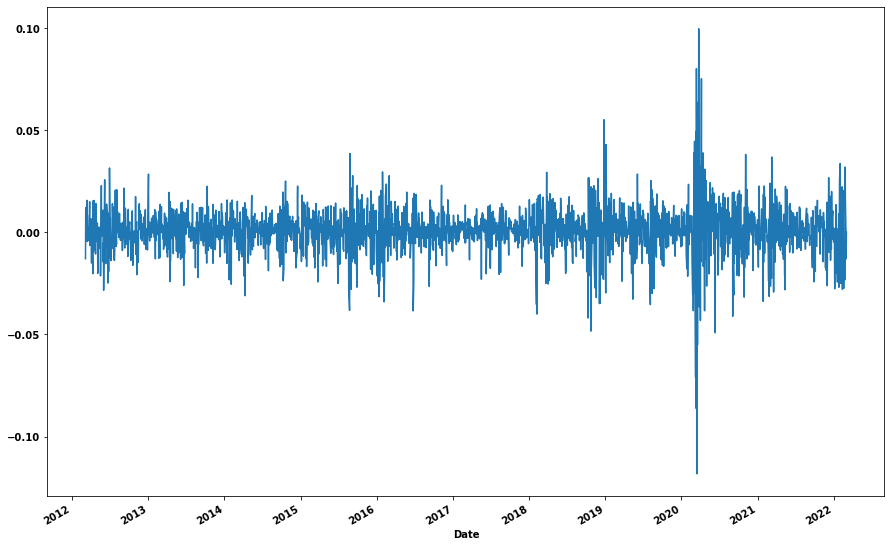

In [ ]:
NASDAQ_100_dataset.reset_index().groupby('Date')['return'].median().plot(figsize = (15,10));

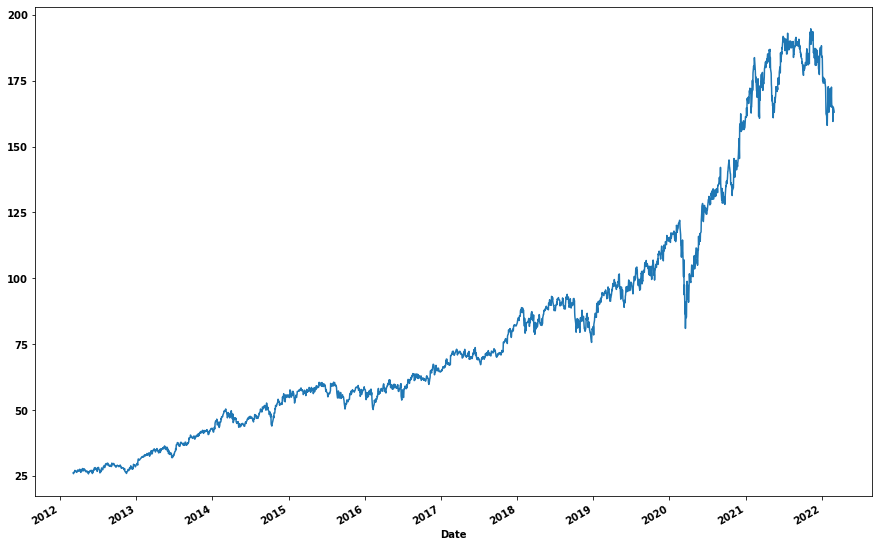

In [ ]:
NASDAQ_100_dataset.reset_index().groupby('Date')['adjclose'].median().plot(figsize = (15,10));